Apply gamma transform to an image. Plot histogram.

Then apply histogram equalization to see the enhancement.

Plot histogram and compare.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

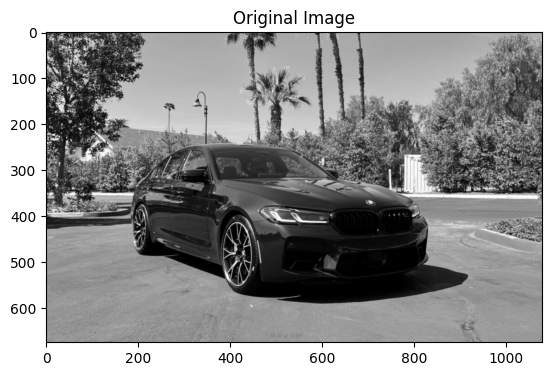

In [2]:
# Load an image in grayscale
image = cv2.imread('BMW-M5-Competition.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

## Apply Gamma Transformation and Plot Histogram

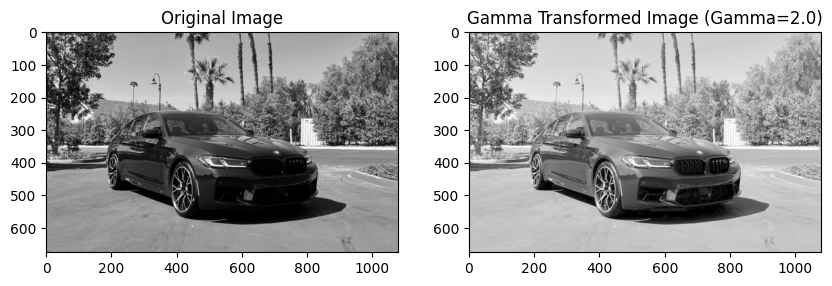

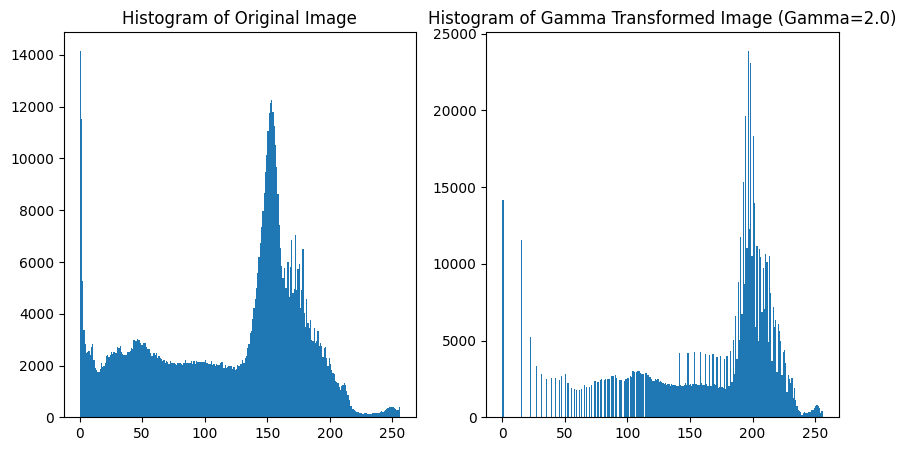

In [3]:
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply gamma transformation
gamma = 2.0
gamma_transformed = adjust_gamma(image, gamma=gamma)

# Plot original and gamma transformed images
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gamma_transformed, cmap='gray')
plt.title(f'Gamma Transformed Image (Gamma={gamma})')

plt.show()

# Plot histograms
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')

plt.subplot(1, 2, 2)
plt.hist(gamma_transformed.ravel(), 256, [0, 256])
plt.title(f'Histogram of Gamma Transformed Image (Gamma={gamma})')

plt.show()


## Apply Histogram Equalization and Plot Histogram

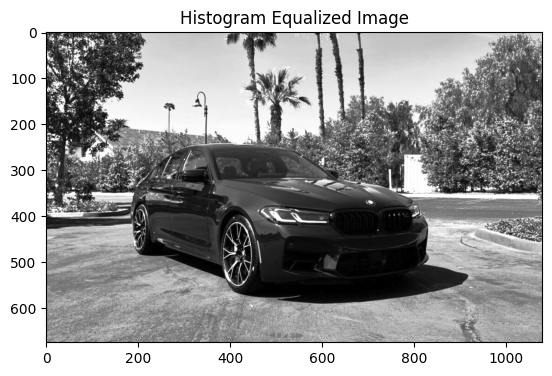

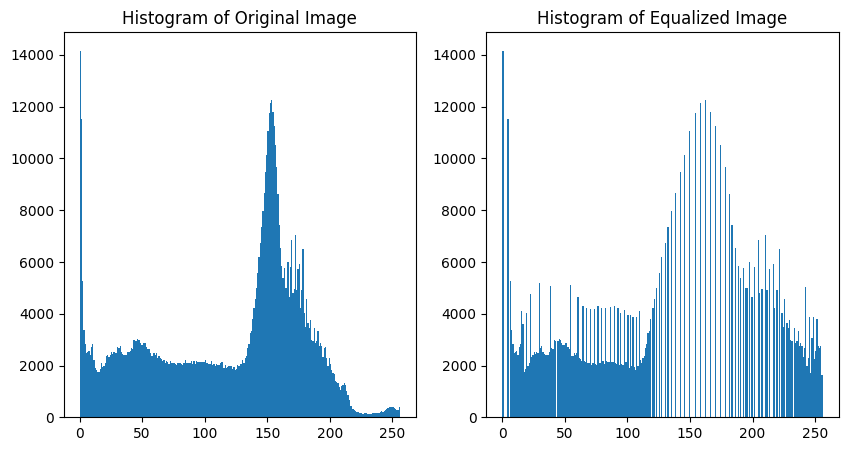

In [4]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Plot equalized image
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()

# Plot histogram
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Histogram of Equalized Image')

plt.show()


## Implement Histogram Matching

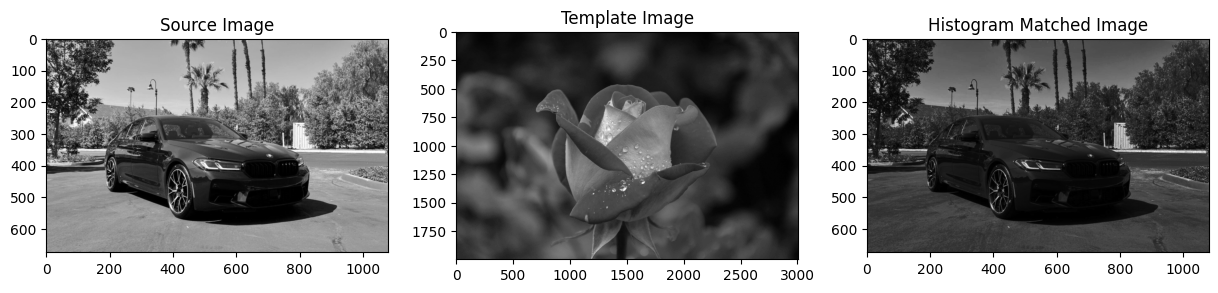

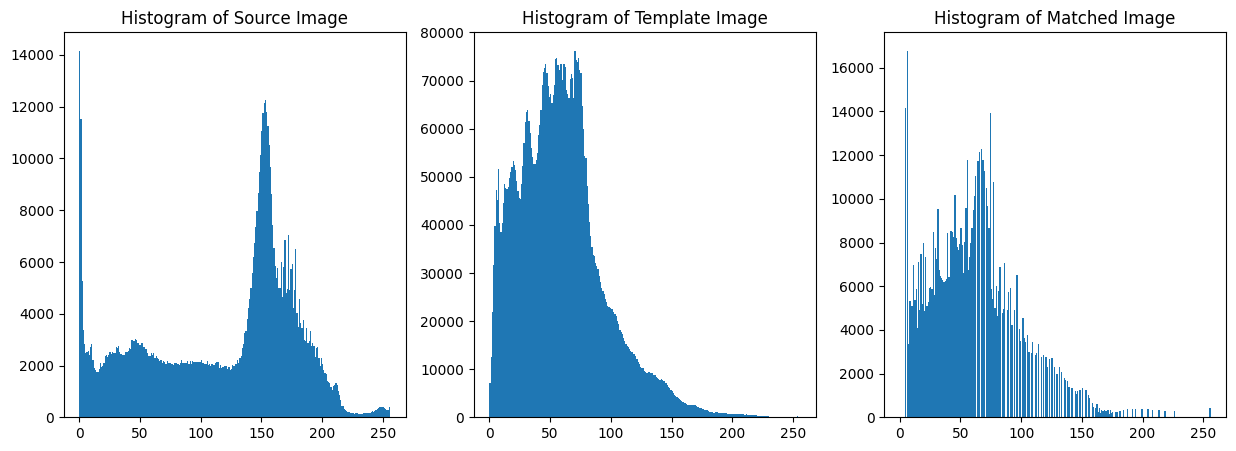

In [6]:
def histogram_matching(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # Get the unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # Calculate the cumulative distribution function (CDF) for the source and template
    s_quantiles = np.cumsum(s_counts).astype(np.float64) / source.size
    t_quantiles = np.cumsum(t_counts).astype(np.float64) / template.size

    # Interpolate pixel values of the source image to match the CDF of the template
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

# Load a template image
template_image = cv2.imread('flower.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply histogram matching
matched_image = histogram_matching(image, template_image)

# Plot images and their histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Source Image')

plt.subplot(1, 3, 2)
plt.imshow(template_image, cmap='gray')
plt.title('Template Image')

plt.subplot(1, 3, 3)
plt.imshow(matched_image, cmap='gray')
plt.title('Histogram Matched Image')

plt.show()

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Histogram of Source Image')

plt.subplot(1, 3, 2)
plt.hist(template_image.ravel(), 256, [0, 256])
plt.title('Histogram of Template Image')

plt.subplot(1, 3, 3)
plt.hist(matched_image.ravel(), 256, [0, 256])
plt.title('Histogram of Matched Image')

plt.show()
